# 蒸散发基本知识

蒸散发是水循环中重要的环节，这里简单记录下与该物理量相关的基本概念及计算公式等。

主要参考资料有：

- 联合国粮农组织的文档: [Crop evapotranspiration - Guidelines for computing crop water requirements - FAO Irrigation and drainage paper 56](http://www.fao.org/3/X0490E/x0490e00.htm#Contents)
- [usbr/et-demands](https://github.com/usbr/et-demands)
- [Methods of estimating potential and actual evaporation](https://www.researchgate.net/file.PostFileLoader.html?id=58b6feb8f7b67e3dc71ca3c1&assetKey=AS%3A467146313605122%401488387768864)（注意点击即下载了）

FAO56是一个guideline for computing crop water requirements的文档。FAO56主要是更新了计算reference and crop evapotranspiration的方法。因为其之前版本（1977年的FAO24）虽然可以满足日尺度要求，精度也较好，但是随着研究进展，FAO24的公式暴露了一些缺点，常会高估蒸散发，所以1990年，FAO组织专家学者review了计算crop water requirements的方法来修正旧方案。专家建议使用Penman-Monteith公式来作为reference evapotranspiration新标准，并建议了计算各个参数的方法。因为新方式只结合Penman-Monteith公式和有限的气候数据，所以能为大尺度计算crop water requirement calculations 提供一种较好的方式。可以为灌溉工程师，水文学者，学生等计算reference和crop evapotranspiration提供指导。也可以用来计算irrigated和rainfed agriculture的crop water requirements 以及农业和自然植被的耗水。新方法就是FAO56的Penman-Monteith equation，一种从**气象数据中标准化计算reference蒸散发**的方法。

## 蒸散发简介

主要区分几个概念：reference crop evapotranspiration ($ET_o$)和crop evapotranspiration under standard conditions ($ET_c$)和various management and environmental conditions($ET_{c \  \ adj}$)。

### Evapotranspiration process

evapotranspiration （ET）包括两个部分，其一是 evaporation，表示土壤表面水分蒸发损失，另一部分是 transpiration ，是指crop的水分散失，两者一起称为 evapotranspiration 。

evaporation 是 水分由液转气，并从蒸发表面散去的过程，比如湖面，河面，道路，土壤和植被等。蒸发吸热，因为分子需要能量才能逃逸。直接的太阳辐射，还有环境气温提供了这种能量。蒸发面的水汽压差是蒸发面的水汽压与周围大气的水汽压差。随着蒸发的进行，周围的空气逐渐饱和，蒸发过程将会减慢，如果潮湿的空气不转移到大气中，这一过程可能会停止。

当蒸发面为土壤表面时，作物冠层的遮荫程度和蒸发面可用水量是影响蒸发过程的其他因素。频繁的降雨、灌溉从浅水表向土壤上方输送，会湿润土壤表面。在土壤能够快速供水以满足蒸发需求的地方，土壤的蒸发仅由气象条件决定。然而，当降雨和灌溉之间的间隔变大，土壤将水分输送到表面的能力变弱时，表层土壤的含水量下降，土壤表面变干。在这种情况下，有限的水的可用性对土壤蒸发产生控制作用。在土壤表面没有水供应的情况下，蒸发会迅速减少，并可能在几天内几乎完全停止。

transpiration 包括蒸发植物组织中含有的液态水并向大气中排放水蒸气。作物主要通过气孔失去水分。气孔是植物叶子上的小开口，气体和水蒸气会通过这些小开口。水分和一些营养物质被植物的根部吸收，并通过植物运输。蒸发发生在叶片内部，即细胞间隙内，与大气的蒸汽交换由气孔孔控制。几乎所有的水分都通过蒸腾作用流失了，只有一小部分在植物内部被利用。蒸腾作用和直接蒸发一样，取决于能量供应、蒸汽压力梯度和风。因此，在评估蒸腾作用时，应考虑辐射、气温、空气湿度和风的条件。土壤含水量和土壤将水分输送到根系的能力也决定了蒸腾速率，涝渍和土壤水盐度也是如此。蒸腾速率还受作物特性、环境因素和栽培措施的影响。不同种类的植物有不同的蒸腾速率。在评价蒸腾作用时，不仅要考虑作物的类型，还要考虑作物的发育、环境和管理。

蒸发和蒸腾同时发生，这两个过程很难区分。除了表层土壤的水分有效性外，作物土壤的蒸发主要取决于到达土壤表面的太阳辐射的比例。随着作物的生长和作物冠层遮挡越来越多的地面面积，这一比例在生长过程中逐渐降低。**当作物很小的时候，水分主要是由于土壤蒸发而损失的，但是一旦作物生长良好并完全覆盖了土壤，蒸腾作用就成为主要过程**，在播种时，近100%的ET来自蒸发，而在作物全覆盖时，90%以上的ET来自蒸腾。

![](QQ截图20200826221408.png)

### Units

ET rate 单位通常是 mm/unit time ，rate表示的是单位时间的蒸散发水深当量。举例，对于一个 10000 $m^2$ 的面积，1mm/day就是 1000 $m^3/ha/day$。水深也可以单位面积接收的能量表示，该能量是指蒸散发所需的热能，称作 the latent heat of vaporization ($\lambda$)，是水温的函数。比如 20摄氏度对应 $\lambda$ 是 2.45 MJ/kg 。也就是说蒸发1kg的水需要2.45MJ能量。因此，可以一平方米 2.45MJ能量的输入可以蒸发1mm的water，所以1mm 水等价于 2.45 $MJ/m^2$ .以 $MJ/m^2/day$ 表示的ET rate 由 $\lambda _{ET}$ 潜热通量the latent heat flux 表示。

### Factors affecting evapotranspiration

影响 Evapotranspiration 的因素通常有：Weather parameters, crop characteristics, management and environmental aspects

![](QQ截图20200826221652.png)

主要的天气参数有  radiation, air temperature, humidity and wind speed.  大气蒸发能力The evaporation power of the atmosphere 由 the reference crop evapotranspiration ($ET_0$) 表示. $ET_0$ 代表了标准植被表面的蒸散发。

The crop type, variety and development stage 是考虑植被蒸散发的关键因素。标准条件下的作物蒸散量($ET_c$)是指在土壤水分适宜、管理和环境条件良好的条件下，大面积种植作物，在一定的气候条件下达到充分生产所需的蒸发量。

土壤盐碱度、土地肥力差、肥料施用有限、土层坚硬或不能渗透、病虫害防治缺乏以及土壤管理不善等因素可能限制作物的生长，减少蒸散发。在评估ET时需要考虑的其他因素包括地面覆盖、植物密度和土壤含水量。土壤含水量对ET的影响主要取决于水分亏缺的大小和土壤类型。另一方面，过多的水分会导致涝渍，可能会损害根系，通过抑制呼吸来限制根系对水分的吸收。在评估ET率时，应额外考虑影响ET过程的气候和作物因素的管理措施范围。

耕作方式和灌溉方式可以改变小气候，影响作物特性或影响土壤和作物表面的湿润。防风林可以降低风速，并直接降低ET率。这种影响可能是显著的，特别是在多风、温暖和干燥的条件下，虽然树木本身的蒸发蒸腾可能抵消了田间的任何减少。在年轻果园里，树木间距很大，可以使用精心设计的滴灌或滴灌系统来减少土壤蒸发。滴管直接将水喷洒在树木附近的土壤上，从而使土壤表面的主要部分保持干燥，并限制蒸发损失。使用地膜，特别是当作物很小的时候，是另一种大幅度减少土壤蒸发的方法。抗蒸腾剂，如封闭气孔、成膜或反射物质，可减少作物的水分损失，从而降低蒸腾速率。

### Evapotranspiration concepts

现在来区分 reference crop evapotranspiration ($ET_o$)和crop evapotranspiration under standard conditions ($ET_c$)和various management and environmental conditions($ET_{c \  \ adj}$) 这几个概念。

![](QQ截图20200826222218.png)

$ET_o$ 就是一个reference surface不缺水时的蒸散发率，称为 the reference crop evapotranspiration 或者 reference evapotranspiration。reference surface 是一个假定的有一些特定特征的grass reference crop。其他概念比如potential ET 为了避免歧义，尽量少用。

影响$ET_o$的只有climatic parameters，所以只从天气数据即可计算得到。FAO Penman-Monteith 公式是唯一推荐的计算$ET_o$的公式。

$ET_c$ 是指无疾病土壤肥沃大面积土地中生长的作物在土壤水分充足，给定气候条件下能丰收的条件下的蒸散发。

定义crop water requirement 为补充croped field 蒸散发损失所需的水量。虽然crop water requirement 和 crop evapotranspiration 数值上相同，但是两者表达的意义环境是不同的，前者重在指需供应的水量，后者片中植被蒸腾损失水量。The irrigation water requirement 基本上代表了crop water requirement 和 effective precipitation之间的差值。The irrigation water requirement 还包括 其他的用于leaching of salts 和 compensate for non-uniform of water application 的水量。

$ET_c$ 通常用一个系数乘以$ET_o$来计算，这个系数$K_c$随作物类型及其成长时段会变化。 

$ET_{c \  \ adj}$是crop在不同于标准条件的环境下生之时的蒸散发。它的计算还会再用一个系数$K_s$来表达，或者通过调整 $K_c$来计算。

### Determine Evapotranspiration

推求蒸散发的方式有多种。比如直接观测，观测仪器是lysimeter，不过蒸散发并不是那么容易观测的，此法成本高，需要精确测量和良好的测量条件，目前主要用于对其他间接推求蒸散发的方法做evaluation时用。

Energy balance and microclimatological methods。蒸散发需要能量，所以植被表面能量交换控制着蒸散发过程。能量守恒：$R_n-G-\lambda ET - H = 0$, $R_n$是净辐射，H是显热，G是土壤热通量，$\lambda ET$是潜热通量。该方程仅适用于 大面积homogeneous的植被表面。

soil water balance。此法是估计incoming 和 outgoing water flux into the crop root zone。Irrigation(I)和rainfall(P)增加水到the root zone。I 和P的一部分由地下径流(RO)和deep percolation(DP)占去。植被毛细吸收到root zone一部分（capillary rise(CR)），或者水平吸入吸出：subsurface flow in($SF_{in}$) or out($SF_{out}$)。如果除了ET所有通量都可推测，那么蒸散发根据土壤含水量的变化(SW)就能推算出来：$ET=I+P-RO-DP+CR \pm \triangle SF \pm \triangle SW $。显然这些量都不好给出，因此此法只能用于周以上单位时间的长时间范围内计算。

Lysimeters。通过将crop zone 从环境中剥离出来，上面soil water balance的公式的各项指标就能很准确地确定。这个过程可以再lysimeters中实现。前面说了此法贵，直在某些特定地研究目的下才用。

ET computed from meteorological data。此法是很常用地方法。大量的经验，半经验公式用来根据气象数据评估crop蒸散发。这也是本文记录的方法。

ET estimated from pan evaporation。水面蒸发数据和cropped surface的蒸散发差别很大。不过蒸发皿还是能通过经验系数和$ET_o$之间建立起联系。

## Reference Evapotranspiration ($ET_o$) 的计算

计算 $ET_o$ 的方法有很多，可以参考这里：[phydrus/pyet](https://pyet.readthedocs.io/en/latest/methods/index.html)

接下来以 FAO-56 和 Priestley-Taylor 为例介绍。

### FAO-56 Penman-Monteith equation

先列一下公式，再一点点解释：

$$ET_o=\frac{0.408\Delta (R_n-G)+\gamma \frac{900}{T+273}u_2(e_s-e_a)}{\Delta +\gamma (1+0.34u_2)}$$

1948年，Penman将能量平衡和质量转移方法结合起来，从阳光、温度、湿度和风速的标准气候记录中推导出一个公式来计算开阔水面的蒸发。参考这篇文章：https://doi.org/10.1016/j.jhydrol.2006.06.012

$$PE=\frac{\Delta (R_n-G)+\gamma 6.43(1+0.536u_2)(e_s-e_a)}{\lambda (\Delta +\gamma)}$$

其中，

- $\Delta$ 是饱和蒸汽压相对于温度的斜率 [kPa/°C] 由平均气温算得饱和蒸汽压，再和平均气温结合求得
- $R_n$ 是净辐射 [MJ/m2/d] 净短波辐射和净长波辐射之差，这部分计算相对复杂一些，后面有记录
- G 是土壤热通量 [MJ/m2/d]，日尺度下设置为0
- $\gamma$是Psychrometric constant [kPa/°C] 由地面大气压（根据地面高程得到）和/或 平均气温求得
- 1 和 0.536 都属于wind coefficient [m/s]  6.43 是文章中给的数，phydrus/pyet 给的默认值是2.6：https://pyet.readthedocs.io/en/latest/methods/combination.html
- $u_2$是风速,
- $e_s$是饱和蒸汽压 [kPa]，可以根据最高最低气温得到，也可以根据平均气温得到
- $e_a$是实际蒸汽压 [kPa]，根据最高最低相对湿度结合最高最低气温得到，没有相对湿度的化就按照饱和蒸汽压计算
- $\lambda$是水蒸发潜热 [MJ/kg] 根据平均气温得到
    
彭曼公式是基于地表能量平衡公式： $R_n=LE+G+H$ ，更多内容可以参考：https://zhuanlan.zhihu.com/p/59166965

具体的推导过程可以参考：https://edepot.wur.nl/183107

水面蒸发和作物蒸发还是有不同的。在水面基础上，通过引入阻力因素可以扩展到**作物表面**。如下图所示。

cropped表面和水面的主要不同：

- 作物表面(例如，0.23)和水面(0.05 - 0.07)的反照率(或太阳辐射的反射系数)是不同的
- 作物表面有粗糙度(取决于作物高度和风速)，因此空气动力阻力(ra)与水面有很大的不同。

阻力有空气动力阻力和表面阻力因子(下图)。“bulk”表面阻力参数，与空气动力阻力是串联的。

![](x0490e07.jpg)

表面阻力($r_s$)描述了水蒸气通过气孔、总叶面积和土壤表面的阻力。空气动力阻力，$r_a$，描述了来自植被向上的阻力和来自空气流过植被表面的摩擦。虽然植被层的交换过程过于复杂，不能完全用这两个阻力因子来描述，但是在测量和计算的蒸散发速率之间可以得到很好的相关性，特别是在均匀的草参考面。

1965年，Monteith提出了Penman-Monteith equation :

$$PE=\frac{\Delta (R_n-G)+\rho_a c_p 86400\frac{e_s-e_a}{r_a}}{\lambda(\Delta +\gamma (1+\frac{r_s}{r_a}))}$$

其中，

- $\rho_a$ 是恒定气压下的空气密度，由地面大气压，实际蒸汽压和平均气温求得
- $c_p$ 是Specific heat of air [MJ/kg/°C] 通常是常数
- $r_a$ 是 空气动力阻力 [s/m] 一般由风速得到
- $r_s$ 是 bulk表面阻力 [s/m] 根据LAI，二氧化碳浓度等一系列数据得到，没有LAI的话指定为常数

如上所述，Penman-Monteith方法包括了控制能量交换和相应的潜热通量(蒸散发)的所有参数。大部分的参数都是测量出来的，或者可以很容易地从天气数据中计算出来。该方程可以直接计算任意作物的蒸散发，因为作物的表面和空气阻力是作物特有的。

通常指定reference surface，将$ET_o$和植被联系起来，这样$r_s，r_a$就定下来了，就更容易为作物蒸腾做估算，标准作物选定为：A hypothetical reference crop with an assumed crop height of 0.12 m, a fixed surface resistance of 70 $s\ m^{-1}$ and an albedo of 0.23. 即$ET_o$ 对应的reference surface是一个假定的grass reference crop，高度0.12m，fixed surface resistance 是 70 $s\ m^{-1}$，且albedo为0.23。70 $s\ m^{-1}$ 反映的是一个周灌溉的moderately dry soil条件。这样就有了FAO-56的Penman-Monteith equation：

$$ET_o=\frac{0.408\Delta (R_n-G)+\gamma \frac{900}{T+273}u_2(e_s-e_a)}{\Delta +\gamma (1+0.34u_2)}$$
其中，

- $ET_o$ reference evapotranspiration [$mm day^{-1}$],
- $R_n$ net radiation at the crop surface [$MJ\ m^{-2}\ day^{-1}$],
- G soil heat flux density [$MJ\ m^{-2}\ day^{-1}$],
- T mean daily air temperature at 2 m height [°C], 
- $u_2$ wind speed at 2 m height [$m\ s^{-1}$],
- $e_s$ saturation vapour pressure [kPa],
- $e_a$ actual vapour pressure [kPa],
- $e_s-e_a$ saturation vapour pressure deficit [kPa],
- ∆ slope vapour pressure curve [$kPa\ °C^{-1}$],
- γ psychrometric constant [$kPa\ °C^{-1}$].

运用此公式时需要的数据主要包括：site location, air temperature, humidity, radiation, 和 wind speed，时间尺度：日/周/10天/月，注意单位。从气象数据推求气候参数以及补充缺失数据以计算$ET_o$的方法后面会有记录。

Location。主要是海拔和纬度。这些数据可用来调整大气压的天气参数，以及计算extraterrestrial radiation($R_a$)，有些实例中还可以计算 daylight hours(N)。计算中纬度用弧度表示（decimal degrees times $\pi /180$），正值表示北半球，负值表示南半球。

Temperature。日最高最低温度，单位摄氏度。如果只有平均气温，也可以推求。

Humidity。日平均actual vapour pressure, $e_a$, 单位kPa。如果没有可以从最大最小相对湿度，露点温度等推求。

Radiation。日净辐射。通常没有这项数据，不过可以从平均短波辐射或者日照时长来推求。

Wind speed。地表2m的风速，高度很重要，如果不一致需要换算。

下面看个例子

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyet as pyet

In [2]:
data = pd.read_csv("data/et_coagmet.txt", parse_dates=True, index_col="date")
data.head()

,name,tavg,tmax,tmin,rhmax,rhmin,solar,windrun,et_asce,et_pk,et_asce0
date,,,,,,,,,,,
2020-01-01,hyk02,-0.8,9.4,-8.9,0.929,0.470,63.1,203.1,1.9,1.9,1.2
2020-01-02,hyk02,0.8,7.2,-4.2,0.902,0.568,107.4,314.7,1.7,1.7,1.1
2020-01-03,hyk02,-0.4,5.0,-4.7,0.855,0.448,76.2,239.6,1.7,1.3,1.1
2020-01-04,hyk02,4.1,16.1,-4.8,0.893,0.224,97.6,253.7,4.0,1.7,2.4
2020-01-05,hyk02,0.5,8.2,-6.9,0.820,0.232,102.3,312.2,3.1,1.9,1.9


In [10]:
meteo = pd.DataFrame({"tmean":data["tavg"], "tmax":data["tmax"],
                      "tmin":data["tmin"], "rhmax":data["rhmax"]*100,
                      "rhmin":data["rhmin"]*100, "u2":data["windrun"]*1000/86400,
                      "rs":data["solar"]*86400/1000000})
tmean, tmax, tmin, rhmax, rhmin, wind, rs = [meteo[col] for col in meteo.columns]
lat = 40.49*np.pi/180

In [11]:
e0_fao56 = pyet.pm_fao56(tmean, wind, rs=rs, elevation=1138, lat=lat, 
                         tmax=tmax, tmin=tmin, rhmax=rhmax, rhmin=rhmin)

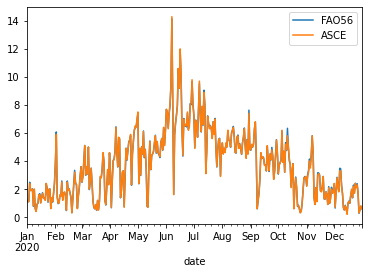

In [13]:
e0_coagmet = data["et_asce0"]
e0_fao56.plot(label="FAO56")
e0_coagmet.plot(label="ASCE")
plt.legend()

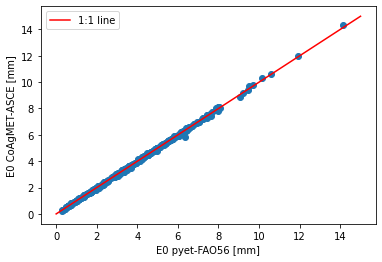

In [14]:
plt.scatter(e0_fao56, e0_coagmet)
plt.plot([0,15],[0,15], color="red", label="1:1 line")
plt.legend()
plt.xlabel("E0 pyet-FAO56 [mm]")
plt.ylabel("E0 CoAgMET-ASCE [mm]");

### Meteorological data

FAO56公式需要多种气候物理参数，需要从气象数据中推算。几个主要的天气参数（weather parameters）如下。

- Solar radiation。辐射是蒸散发的能量源
- Air Temperature。显热影响蒸散发。
- Air humidity。空气湿度也能决定蒸散发
- Wind speed。风速影响空气流动，影响蒸散发

在了解这些天气参数计算之前，每部分都要先看一些大气参数（atmospheric parameters）。下面会依次记录气温，空气湿度，辐射，风速，每块都会先介绍一些大气参数。

#### Atmospheric pressure（P）

$$P=101.3(\frac{293-0.0065z}{293})^{5.26}$$
其中，z是海拔。

#### Latent heat of vaporization（$\lambda$）

蒸发潜热，表示了常温常压下单位质量液态水转换为气态水所需的能量。它是温度的函数。温度越高越小。FAO56中用的是温度为20摄氏度时的值，2.45$MJ\ kg^{-1}$

#### Psychrometric constant（$\gamma$）

$$\gamma = \frac{c_p P}{\epsilon \lambda}=0.665*10^{-3} P$$
其中，

- $\gamma$ psychrometric constant [$kPa\ °C^{-1}$],
- P atmospheric pressure [kPa],
- λ latent heat of vaporization, 2.45 [$MJ kg^{-1}$],
- $c_p$ specific heat at constant pressure, 1.013 $10^{-3}\ [MJ\ kg^{-1} °C^{-1}]$,
- ε ratio molecular weight of water vapour/dry air = 0.622

$c_p$ 是指常压下单位质量空气温度升高一度所需的能量，其值却决于空气湿度，平均条件下可以用上述常数。

#### Air temperature

气温通常是指地面2m高的温度。

#### Air humidity

空气中的水分由多种表示方式，在农业气象中，通常使用vapour pressure，dewpoint temperature和relative humidity来表示空气湿度。

首先，vapour pressure。水蒸气是大气压贡献的一部分。空气中水量和水蒸气所施气压是直接相关的。单位通常用kPa表示。蒸发水面处水分子逃出液体和进入液体水处于平衡态。这时候空气中不能再多容纳水分子，因此称这时候的蒸汽压为饱和蒸汽压（saturation vapour pressure($e^o(T)$)），其值取决于温度。温度越高，饱和蒸汽压越大。实际vapour pressure（$e_a$）是空气中水的汽压。空气不饱和时，蒸汽压自然比饱和蒸汽压小。实际蒸汽压和饱和蒸汽压的差值称为 vapour pressure deficit 或者saturation deficit，该值是空气实际蒸发能力的准确指标。

Dewpoint temperature。露点温度是空气中水需要凝结以使空气饱和的温度。实际的空气vapour pressure就是露点温度下的饱和蒸汽压。空气约干燥，气温和露点温度差别就越大。

Relative humidity。相对湿度（RH）表示空气饱和程度为实际蒸汽压和饱和蒸汽压在同一温度下的比例：
$$RH=100\frac{e_a}{e^o(T)}$$ 
百分比数值。实际蒸汽压一天内变化相对较小，但是相对湿度在不同温度下变化很大。

直接观测实际蒸汽压是不可能的。因此通常由相对湿度或者露点温度来推求。推求内容如下所示。

Mean saturation vapour pressure（$e_s$）。
$$e^o(T)=0.6108 exp[\frac{17.27T}{T+237.3}]$$
时段平均可以用：
$$e_s=\frac{e^o(T_{max})+e^o(T_{min})}{2}$$

Slope of saturation vapour pressure curve($\triangle$)。蒸散发计算需要$\triangle$，即饱和蒸汽压和温度之间的关系曲线（下图所示）在某个温度下的斜率。

![](QQ截图20200827164114.png)

$$\Delta=\frac{4098[0.6108exp(\frac{17.27T}{T+237.3})]}{(T+237.3)^2}$$
FAO56中，$\Delta$通常用平均气温时的斜率表示。

Actual vapour pressure derived from dewpoint temperature。
$$e_a=e^o(T_{dew})=0.6108exp[\frac{17.27T_{dew}}{T_{dew}+237.3}]$$

Actual vapour pressure derived from psychrometric data。
$$e_a=e^o(T_{wet})-\gamma _{psy}(T_{dry}-T_{wet})$$
从RH推求实际蒸汽压时，方法之一就是从 psychrometer 观测结果来推求。psychrometer 是用一对测温计，一个测干燥条件下的温度，一个测湿润条件（固定的饱和度）下的，温差称为wet bulb depression，是空气湿度的衡量方式。

$\gamma _{psy}$ 和仪器有关，详见原文，这里不赘述了。

Actual vapour pressure derived from relative humidity data。
$$e_a=\frac{e^o(T_{min})\frac{RH_{max}}{100}+e^o(T_{max})\frac{RH_{min}}{100}}{2}$$
$RH_{min}$误差大时，可以只用$e^o(T_{min})\frac{RH_{max}}{100}$计算。

没有$RH_{min}$和$RH_{max}$时，可以用平均相对湿度，不过不推荐。
$$e_a=\frac{RH_{mean}}{100}[\frac{e^o(T_{max})+e^o(T_{min})}{2}]$$

Vapour pressure deficit($e_s-e_a$) 根据前面的公式联合计算。

#### Radiation

这部分的计算相对最复杂。

Extraterrestrial radiation($R_a$)。太阳垂直直射到大气层顶的辐射称为solar constant，大约是 0.082 $MJ\ m^{-2}\ min^{-1}$。地面辐射就受辐射角度和距大气层表面距离影响。一大气层顶部水平面接受的太阳辐射称为extraterrestrial (solar) radiation, $R_a$，其随季节，太阳位置，天数长度等变化，是一个关于纬度，白天时长的函数。如下图所示：

![](QQ截图20200827171538.png)

Solar or shortwave radiation ($R_s$)。到达地表水平面上的辐射称为solar radiation（$R_s$）。因为太阳辐射一般是短波，所以也称为短波辐射。

Relative shortwave radiation ($R_s/R_{so}$)。$R_{so}$是clear-sky 的太阳辐射，即无云时到达地面的辐射。是大气中云的表达。云越多，该值越小。取值范围大约为（0.33, 1）

Relative sunshine duration (n/N)。另一个表达云多云少的量。日照时长和白天总时长的比例。

Albedo（$\alpha$）and net solar radiation（$R_{ns}$）。被地表反射的辐射比例称为albedo。和地表land cover，地表角度等都有关。net solar radiation，$R_{ns}$，为$(1-\alpha)R_s$

Net longwave radiation($R_{nl}$)。地表也会辐射释放能量，是长波辐射。长波有一部分会被大气反射回地面，释出和重新接受的长波辐射之差就是net longwave radiation，$R_{nl}$。

Net radiation （$R_n$）。净辐射是短波净辐射和长波净辐射的和。通常白天为正，晚上为负。一天的值通常为正。

Soil heat flux（G）。土壤热通量是加热土壤的那部分能量。土壤变热，G为正，变冷，G为负。虽然G和$R_n$相比很小，通常可忽略，理论上能考虑还是要考虑。

观测辐射的仪器由pyranometers等，可以观测净长波和短波辐射。

下面看看一些计算过程。

Extraterrestrial radiation for daily periods ($R_a$)。
$$R_a=\frac{24(60)}{\pi}G_{sc}d_r[\omega _s sin(\phi)sin(delta)+cos(\phi)cos(\delta)sin(\omega _s)]$$
其中，

- $R_a$ extraterrestrial radiation [$MJ\ m^{-2}\ day^{-1}$], 
- $G_{sc}$ solar constant = 0.0820 $MJ\ m^{-2}\ min^{-1}$, 太阳常数是太阳电磁辐射的通量，也就是距离太阳一天文单位处（约为地球离日平均距离），单位面积受到垂直入射的平均太阳辐射强度。
- $\phi$ latitude [rad],
- $d_r$ inverse relative distance Earth-Sun,
- $\delta$ solar declination [rad]
- $\omega_s$ sunset hour angle [rad], 


其中，纬度ϕ, 是用弧度表示的。北半球为正，南半球为负。The conversion from decimal degrees to radians is given by:
$$[radians] = \frac{\pi}{180}[decimal degrees]$$

The inverse relative distance Earth-Sun:
$$d_r =1 + 0.033cos(\frac{2\pi}{365}J)$$
其中，J是几月几日在一年中是第几天。
这个概念没搜到特别好的解释，简单理解下，距离肯定是影响辐射的，而[平方反比定律](https://zh.wikipedia.org/wiki/%E5%B9%B3%E6%96%B9%E5%8F%8D%E6%AF%94%E5%AE%9A%E5%BE%8B)是物理上很常见的法则，所以这里有距离倒数类似的概念也不奇怪，常识可以参考：[Does Distance Affect the Solar Radiation the Planet Receives?](https://sciencing.com/distance-affect-solar-radiation-planet-receives-2341.html)

$\delta$ solar declination，即太阳赤纬，赤纬（英文Declination；缩写为Dec；符号为δ）是天文学中赤道座标系统中的两个坐标数据之一，另一个坐标数据是赤经。赤纬与地球上的纬度相似，是纬度在天球（在天文学和导航上想出的一个与地球同圆心，并有相同的自转轴，半径非常大的球。天空中所有的物体都可以当成投影在天球上的物件。地球的赤道和地理极点投射到天球上，就是天球赤道和天极。天球是位置天文学上很实用的工具，更多科普可以参考：[天球(一)——星图](https://zhuanlan.zhihu.com/p/105777607)上的投影）。太阳的赤纬等于**太阳入射光与地球赤道之间的角度**，由于地球自转轴与公转平面之间的角度基本不变，因此太阳的赤纬随季节不同而有周期性变化，变化的周期等于地球的公转周期，即一年。
$$\delta = 0.409 sin(\frac{2\pi}{365}J - 1.39)$$

$\omega_s$ sunset hour angle，时角的概念可以参考[百科](https://zh.wikipedia.org/wiki/%E6%99%82%E8%A7%92)，时角（HA）是天文学的名词，一个天体的时角被定义为该天体的赤经与当地的恒星时的差值（赤经和恒星时的概念也可以参考：[天球(一)——星图](https://zhuanlan.zhihu.com/p/105777607)）。 在天文学和天文航海中，时角是在赤道坐标系中用于给出天球上点的方向的坐标之一。 一个点的时角是两个平面之间的角度：一个平面包含地轴和[天顶](https://zh.wikipedia.org/wiki/%E5%A4%A9%E9%A0%82)（子午面），另一个平面是穿过该点与极点的球面大圆切圆所形成的平面（赤经圈）。sunset 就是日落时候的时角，一年365/366天每天都是略有不同的。
$$\omega _s = arccos [-tan(\phi)tan(\delta)]$$

总之，地外辐射是个纯天文类的变量，有纬度，日期即可计算。

Daylight hours(N)。
$$N=\frac{24}{\pi} \omega_s$$
$\omega_s$ is the sunset hour angle in radian

Solar radiation ($R_s$)。
$$R_s=(a_s+b_s\frac n N)R_a$$
其中，

- $a_s$ regression constant, expressing the fraction of extraterrestrial radiation reaching the earth on overcast days (n = 0),
- $a_s+b_s$ fraction of extraterrestrial radiation reaching the earth on clear days (n = N).

Clear-sky solar radiation ($R_{so}$)。
$$R_{so}=(0.75+2*10^{-5}z)R_a$$

Net solar or net shortwave radiation ($R_{ns}$)。
$$R_{ns}=(1-\alpha)R_s$$
其中，

- $R_{ns}$:net solar or shortwave radiation [$MJ\ m^{-2}\ day^{-1}$], 
- α：albedo or canopy reflection coefficient, which is 0.23 for the hypothetical grass reference crop [dimensionless],
- $R_s$：the incoming solar radiation [$MJ\ m^{-2}\ day^{-1}$]

Net longwave radiation($R_{nl}$)。

简单补充一个概念，[斯特藩-玻尔兹曼定律](https://zh.wikipedia.org/wiki/%E6%96%AF%E7%89%B9%E8%97%A9%EF%BC%8D%E7%8E%BB%E5%B0%94%E5%85%B9%E6%9B%BC%E5%AE%9A%E5%BE%8B)。又称斯特藩定律，是热力学中的一个著名定律，其内容为： 一个黑体表面单位面积在单位时间内辐射出的总能量（称为物体的辐射度或能量通量密度）$j^*$ 与黑体本身的热力学温度T（又称绝对温度）的四次方成正比，即：
$$j^*=\epsilon \sigma T^4$$
其中辐射度$j^*$具有功率密度的量纲（能量/（时间·距离$^2$）），国际单位制标准单位为焦耳/（秒·平方米），即瓦特/平方米。绝对温度T的标准单位是开尔文，${\displaystyle \epsilon }$ 为黑体的辐射系数；若为绝对黑体，则${\displaystyle \epsilon =1}$.

比例系数σ称为斯特藩-玻尔兹曼常数或斯特藩常量。它可由自然界其他已知的基本物理常数算得，因此它不是一个基本物理常数。

斯特藩-玻尔兹曼定律是一个典型的幂次定律。

依上定律，longwave energy emission 是正比于温度的四次方的。humidity 和 cloudiness 也有重要作用, 所以估计net outgoing flux of longwave radiation时 Stefan-Boltzmann law 需要用这两个 factors 来做修正。
$$R_{nl} = \sigma [\frac{T_{max,K} ^4 + T_{min,K} ^4}{2}](0.34-0.14\sqrt{e_a}(1.35\frac{R_s}{R_{so}}-0.35)$$
其中，

- $R_{nl}$：net outgoing longwave radiation [$MJ\ m^{-2}\ day^{-1}$],
- σ：Stefan-Boltzmann constant [ $4.903*10^{-9}\ MJ\ K^{-4}\ m^{-2}\ day^{-1}$],
- $T_{max,K}$: maximum absolute temperature during the 24-hour period [K = °C + 273.16], 
- $T_{min,K}$: minimum absolute temperature during the 24-hour period [K = °C + 273.16], 
- $e_a$：actual vapour pressure [kPa],
- $R_s/R_{so}$:relative shortwave radiation (limited to ≤ 1.0), 
- $R_s$: measured or calculated (Equation 35) solar radiation [$MJ\ m^{-2}\ day^{-1}$], 
- $R_{so}$：calculated (Equation 36 or 37) clear-sky radiation [$MJ\ m^{-2}\ day^{-1}$].

最高温和最低温四次方的均值常用来计算天级别的 Stefan-Boltzmann equation。$(0.34-0.14\sqrt{e_a})$ 表示的是对 air humidity的修正, 会随着 humidity增加而变小。cloudiness 的效果由 (1.35 Rs/Rso - 0.35) 表达。它会随着 cloudiness 增加变小，而因此使 Rs 减小。


Net radiation($R_n$).
$$R_n=R_{ns}-R_{nl}$$

Soil heat flux（G）。
$$G_{day}\approx 0$$

接下来看wind speed。气象上通常测得是10m风俗，所以要转为2m风速：
$$u_2=u_z\frac{4.87}{ln(67.8z-5.42)}$$

如果有些数据没有，还可以用各种方法估算。这里暂不描述。

### $ET_o$ 计算过程小结

FAO Penman-Monteith equation:

$$ET_o=\frac{0.408\triangle (R_n-G)+\gamma \frac{900}{T+273}u_2(e_s-e_a)}{\triangle +\gamma (1+0.34u_2)}$$
其中，

- $ET_o$ reference evapotranspiration [$mm day^{-1}$],
- $R_n$ net radiation at the crop surface [$MJ\ m^{-2}\ day^{-1}$],
- G soil heat flux density [$MJ\ m^{-2}\ day^{-1}$],
- T mean daily air temperature at 2 m height [°C], 
- $u_2$ wind speed at 2 m height [$m\ s^{-1}$],
- $e_s$ saturation vapour pressure [kPa],
- $e_a$ actual vapour pressure [kPa],
- $e_s-e_a$ saturation vapour pressure deficit [kPa],
- ∆ slope vapour pressure curve [$kPa\ °C^{-1}$],
- γ psychrometric constant [$kPa\ °C^{-1}$].

计算主要包括：

1. 从$T_{max}$和$T_{min}$，altitude（z）和平均风速（$u_2$）推求气候参数
2. 计算vapour pressure deficit（$e_s-e_a$）。饱和蒸汽压$e_s$从$T_{max}$和$T_{min}$推求，$e_a$从 $T_{dew}$或 $RH_{max}$和$RH_{min}$, 或者$RH_{max}$, 或者 $RH_{mean}$推求。
3. 计算$R_n$，G在日尺度下可忽略，转换单位。
4. 结合上述步骤得到$ET_o$

这里暂时主要关注日尺度。所需的气象数据：

- Air temperature
- Air humidity
- Wind speed
- Radiation

### Priestley-Taylor方法

接下来再看看Priestley-Taylor方法，公式在这里:https://pyet.readthedocs.io/en/latest/methods/combination.html#priestley-and-taylor-1972 ,下面直接给例子。

In [15]:
data = pd.read_csv("data/etmgeg_260.txt", skiprows=46, delimiter=",", 
                   skipinitialspace=True, index_col="YYYYMMDD", parse_dates=True).loc["2018",:]
data.head()

,# STN,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
YYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2018-01-01,260,225,45,50,90,2,10,18,190.0,2.0,...,2.0,75.0,3.0,7.0,84,96,17,73,1,3
2018-01-02,260,216,39,45,80,24,20,1,140.0,24.0,...,19.0,75.0,8.0,7.0,88,96,3,80,8,2
2018-01-03,260,257,82,88,120,11,70,4,290.0,3.0,...,1.0,75.0,4.0,8.0,73,95,1,65,9,1
2018-01-04,260,238,51,56,90,20,30,14,180.0,20.0,...,14.0,80.0,21.0,8.0,82,97,14,67,21,2
2018-01-05,260,225,38,40,60,1,20,17,150.0,16.0,...,15.0,75.0,1.0,6.0,87,96,17,71,3,2


In [16]:
# UG:Daily mean relative atmospheric humidity (in percents), Q: Global radiation (in J/cm2) 
meteo = pd.DataFrame({"tmean":data.TG/10, "tmax":data.TX/10, "tmin":data.TN/10, "rh":data.UG, "wind":data.FG/10, "rs":data.Q/100})
tmean, tmax, tmin, rh, wind, rs = [meteo[col] for col in meteo.columns]
pressure =  data.PG / 100 # to kPa
wind = data.FG/10  # to m/s
lat = 0.91
elevation = 4 
# Makkink (1957) 方法的结果 https://pyet.readthedocs.io/en/latest/methods/radiation.html#makkink-1957
pe_knmi = data.EV24 / 10

In [18]:
pe_fao56 = pyet.pm_fao56(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)
pe_pt = pyet.priestley_taylor(tmean, wind, rs=rs, elevation=4, lat=0.91, tmax=tmax, tmin=tmin, rh=rh)

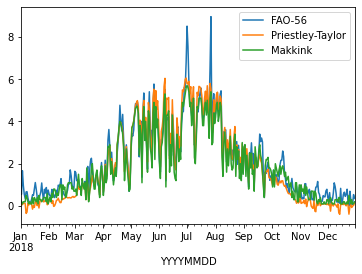

In [19]:
pe_fao56.plot(label="FAO-56")
pe_pt.plot(label="Priestley-Taylor")
pe_knmi.plot(label="Makkink")
plt.legend()

可以看到不同的算法差别还是比较多的.

## Crop Evapotranspiration under standard conditions

天气因素都归到$ET_o$中了，区分cropped surface和reference surface的部分就整合到crop efficient之中。有两种算法，其一是single crop coefficient approach，第二是dual crop coefficient approach。

### Introduction to crop evapotranspiration（$ET_c$）

$ET_c$很难直接观测，直接根据彭曼公式计算也不容易，所以按系数来算。
$$ET_c=K_cET_o$$
$K_c$主要体现crop 特征，也有一部分climate相关的。$K_c$表示了**四类区分crop和reference grass的主要特征**：

- Crop height：影响$r_a$
- Albedo of the crop-soil surface：albedo影响$R_n$
- Canopy resistance：影响$r_s$
- Evaporation from soil

上面的式子预测的是标准条件下的蒸散发，代表了crop 蒸腾的上限，标准条件是指没有因缺水等给crop带来蒸腾限制。

决定系数的因素有多种，**crop类型，生长季节，以及影响soil蒸发的因素**。

#### crop type

通常，$K_c$会比reference（$K_c$=1.0）高5-10%，对于较高的crop，比如maize，sorghum或sugar cane，会达到15-20%，如下图所示。

![](QQ截图20200827212427.png)

#### Climate

风速是影响$r_a$的，尤其对于高的crop。影响$r_a$的除了crop type，还有气候条件和crop高度。$K_c$通常是随着风速增加而增加，随相对湿度的减少而增加。更干旱风更大的条件会有更高的$K_c$的。

![](QQ截图20200827213208.png)

湿润温和风的条件下，$K_c$ 相比reference 变化不大。不论哪种crop type，通常来说，albedo是差不多的。湿润条件下，$e_s-e_a$在crop和reference之间差别也不大，$r_a$也是

干旱条件下，$e_s-e_a$在crop和reference之间差别会更显著，$r_a$也是。

#### soil evaporation

当crop full cover的时候，土壤蒸发就很小了，主要是蒸腾，不过当crop较小时，降雨或灌溉后，土壤蒸发作用就很明显了，这时候的$K_c$就主要取决于土壤湿润情况了。

![](QQ截图20200827214747.png)

用 dual crop coefficient 可以很好地预测 field crop和reference surface之间的土壤蒸发的差异。

#### crop生长阶段

随着作物的成长，ground cover，crop height，和leaf area 都会变化。因此$K_c$要能反映。作物生长可以划分为典型的四部分，initial， crop development， mid-season， 和late season。

![](QQ截图20200827215144.png)

initial stage 是指从**种植到大约10%的地面覆盖**。其和**作物类型，种植日期和气候**都相关。对于多年生植物，种植日期可以由greenup date即新叶子出现的日期替代。在initial stage，leaf area是很小的，蒸发主要是土壤蒸发。当灌溉或降水时，$K_c$是很大的，当土壤很干时，$K_c$很小。dry的时间由两次wetting events之间时间间隔决定。$K_{c\ ini}$的General estimates是关于wetting频率和$ET_o$的函数。

crop development stage 是**从覆盖10%到effective全覆盖**。effective full cover是当crop开花时。对于紧挨着的行间作物，比如大豆，sugar beets，potatoes进而corn，effective full cover可以定义为相邻行间作物的叶子开始接触的时候。不同的作物判断方式不同，暂不赘述。另一种判断方法就是用LAI，LAI=3的时候就是effective full cover。随着crop成长，蒸腾就逐渐取代蒸发称为主要的过程了。

Mid-season stage**从effective full cover到成熟开始**。成熟开始是落叶，或果实长出等。植被蒸腾会减少到reference $ET_o$。这个阶段对于多年生和许多年生作物是最长的。对于vegetable crops是相对短的。这一阶段$K_c$到最大值。$K_{c\ mid}$相对恒定。和reference的区别主要在作物高度和resistance上。

Late-season stage是**作物成熟开始到丰收**。$K_c$的计算到丰收就结束。$K_{c\ end}$能反映crop和水管理实践。值高的话表示crop是经常灌溉的。

现在可以了解 crop evapotranspiration($ET_c$)了。如前所述，有两种算法，一种是只用一个$K_c$，一种是$K_{cb}+K_e$，选择标准如下：

![](QQ截图20200827222640.png)

single crop coefficient approach($K_c$)。这种还是更常用于weekly或更长时段的计算，虽然计算处理可能还是针对日的数据。

dual crop coefficient approach ($K_{cb}+K_e$) crop 蒸腾和soil蒸发是分开的。用两个系数表示，basal crop coefficient($K_{cb}$) 和 soil water evaporation coefficient($K_e$)。
$$K_c=K_{cb}+K_e$$
$K_{cb}$表示土壤表层dry，而root zone足够蒸腾时的$ET_c/ET_o$，反映了没有灌溉或降雨时基准的$K_c$。当有降雨或灌溉时，$K_e$会很大。不过两者之和有上限。

Crop coefficient curve。选择方法之后，crop 生长的时间和crop coefficient可以由crop coefficient curve来确定。

![](QQ截图20200827225329.png)

![](QQ截图20200827225348.png)

可以注意到第一种是第二种一种平滑之后的表现。

基本计算流程：

![](QQ截图20200827225603.png)

### $ET_c$ -- single crop coefficient ($K_c$)

这章节处理标准条件下 ETc 的计算。也就是说，crop growth，土壤水蒸发等都是no limitations的。crop transpiration 和 soil evaporation 的 effect都 整合到Kc中。对 normal irrigation planning and management purposes, the development of basic irrigation schedules, 以及 most hydrologic water balance studies, 这种平均的crop系数都是很相关的，并且也是很方便的计算方法。

$$ET_c=K_cET_o$$

计算过程：

1. 识别crop growth stages，确定stages的length，选择对应的$K_c$系数
2. 根据stage中的气候条件和wetting频率调整选择的$K_c$系数
3. 构建crop coefficient curve
4. 计算$ET_c$

虽然参考的代码使用的主要是第二种，但是第一种方法是相对基础地介绍一些概念，所以有必要快速过一遍。

#### LENGTH OF GROWTH STAGES

FAO24 就已经提供了一些general的不同作物不同气候和位置下的四个阶段的时长，可以见原文Table11 或者 FAO56-Table11.csv。

某些情况下，vegetation的时间，effective full cover的时间可以**用 cumulative degree-based regression equations** 或者更复杂的plant growth model来预测。模型类型应该被local的观测来验证。

对deciduous trees和shrubs这类在春天长叶子很快的，initial和development的时期长度相对较短。

vegetation cove的发展程度，以及达到effective full cover的时间，是受天气条件和平均气温的影响的。因此，planting和effective full cover之间的市场会随climate，latitude，elevation和planting data变化。也会随cultivar（crop variety）变化。通常一达到effective full cover，进一步的phenological development会更依赖于plant genotype 而不是weather。

mid-season 的末尾和 late season 的开头通常会由叶子的衰败标志, 通常是植物更低的叶子先衰败。late season 的时间相对比较短(少于10 天)，vegetation会被frost冻掉 (for example, maize at high elevations in latitudes > 40°N) 或者 农作物会被丰收 (for example, table beets and small vegetables)。

高温会加速农作物的成熟和收割。 长期的高温 (> 35°C) 会导致一些作物，比如 turf grass，进入到休眠。如果严重高温和干旱同时发生，grass就会在接下来的the growing season彻底休眠。缺水或者其他的环境压力会加速作物成熟，并缩短the mid 和 late season 生长时期。

原文表11 给了一个general的guide，是区域的平均各阶段时长。如果可能的话，还是用特定作物生长的local观测较好，local的观测可以通过local调研，或者遥感来获取。

#### CROP COEFFICIENTS

vegetation 和 ground cover 的变化意味着 $K_c$ 在生长阶段会变化。生长时期$K_c$的趋势由 crop coefficient curve 来代表。$K_c$ **只需要三个值来描述和构建 Crop coefficient curve**：those during the initial stage ($K_{c\ ini}$), the mid-season stage ($K_{c\ mid}$) and at the end of the late season stage ($K_{c\ end}$)。

原文表12 Tabulated $K_c$ values 列出了 典型的 $K_{c\ ini}$, $K_{c\ mid}$，$K_{c\ end}$ 针对不同农作物的值，也可见FAO56-Table12.csv。表格是根据group type来组织的，plant height，leaf area，ground coverage 和 water management 相似的 coefficient也相似。

这里的$K_c$是包含了植物蒸腾和土壤蒸发的。这个整体的效果代表了一个平均的wetting frequency。在initial和crop development阶段$K_c$的值受约束于wetting frequency的大变化的影响。因此，$K_{c\ ini}$ 值通常需要修正。对于frequent wettings，比如高频率的灌溉或降水，$K_{c\ ini}$ 会显著增加。

如前所述，表12的 $K_{c\ mid}$，$K_{c\ end}$ 值代表了特定气候条件（RHmin ≈ 45%, u2 ≈ 2 m/s）下的值。对于更干旱或湿润，以及更大风或小风的条件，还需要修正。方法稍后描述。

##### Crop coefficient for the initial stage ($K_{c\ ini}$) 

原文表12中的值应该仅被用于 规划研究中估计ETc。更准确的估计可以考虑的影响因素有以下部分。

- Time interval between wetting events：早期蒸散发主要是蒸发，所以土壤湿度 wetted 频率是重要的。当降水或灌溉较多时，Kc ini会变大，当土壤表面较干时，蒸发就会受限。
- Evaporation power of the atmosphere：还受$ET_o$影响。其值越大，土壤越容易变干，Kc会变小
- Magnitude of the wetting event：土壤变干的时间是wetting事件强度的函数，更小的wetting event导致更小的Kc ini

上面因素可能会使Kc ini的值变化范围从0.1到1.15.

通常wetting events 的平均时间间隔由数清多余一些mm的降水和灌溉时间来估计。相邻天之间的wetting events 可以认为是一个event。平均wetting interval由events数目和initial period的长度来相除得到。

仅仅只有月降雨值时，可以按特定的典型降雨事件的深度与月降水深度来相除判断。对不同的区域使用不同的典型降水深度，由几种：

- Very light (drizzle) ：≤ 3 mm
- Light (light showers) ：5 mm
- Medium (showers) :≥ 10 mm
- Heavy (rainstorms): ≥ 40 mm

当降水不足时，就需要灌溉。即便是没有灌溉，也需要估计来保证crop在stress free条件下生长。**如果不能估计可以直接参考表12中的值**。

有$K_{c\ ini}$ 和 wetting events 频率之间的函数可以用来帮助估计，用几种不同的$ET_o$条件下的几个图表和公式，见原文图29和30。

图29使用到 wetting events 是相对程度较低（小于等于10mm）时候的。当仅仅只有降水的时候，通常用该图来确定Kc ini。

图30则可以使用到heavy wetting events，即周期性灌溉的类型。topsoil的灌溉是充分的，蒸发可用水是充足的。

对于 average wetting events（即infiltration depth在10到40mm之间的），可以用一个插值来计算：
$$K_{c\ ini}=K_{c\ ini(Fig.29)+\frac{I-10}{40-10}[K_{c\ ini(Fig.30)}-K_{c\ ini(Fig.29)}]}$$
其中，I 为 平均infiltration depth[mm]

另外，灌溉的 wetting 通常是局部的，如下图：

![](QQ截图20200902225303.png)

fw常见值可见原文表20，内容如下：

- Precipitation：1.0
- Sprinkler irrigation：1.0
- Basin irrigation：1.0
- Border irrigation：1.0
- Furrow irrigation (every furrow), narrow bed：0.6 ... 1.0
- Furrow irrigation (every furrow), wide bed：0.4 ... 0.6
- Furrow irrigation (alternated furrows)：0.3 ... 0.5
- Trickle irrigation：0.3 ... 0.4

在选择是用表29还是30的时候，average infiltrated depth是需要根据fw来推求的。
$$I_w=\frac{I}{f_w}$$
其中，I 是the irrigation depth for the field [mm]，Iw 是 irrigation depth for the part of the surface that is wetted [mm]，fw是fraction of surface wetted by irrigation

##### Crop coefficient for the mid-season stage ($K_{c\ mid}$)

如前所述，grass reference surface和agricultural crops之间的aerodynamic peoperties的区别不仅仅在crop上，还有climate condition和crop height。更干旱气候和更大风速会导致更大的$K_{c\ mid}$.相反会导致更小值。

根据气象修正的公式：
$$K_{c\ min} = K_{c\ mid(Tab)} + [0.04(u_2-2)-0.004(RH_{min}-45)(\frac{h}{3})^{0.3}] $$
其中

- $K_{c\ mid(Tab)}$：从原文 Table 17获取的 $K_{c\ mid}$
- $u_2$：mid或late season growth stage 时候的2 m height over grass 日风速均值 [$m\ s^{-1}$]，1 $m\ s^{-1}$ ≤ $u_2$ ≤ 6 $m\ s^{-1}$,
- $RH_{min}$：mid或late season growth stage 时候的日最低相对湿度均值 [%]，20% ≤ $RH_{min}$ ≤ 80%,
- h：mid或late season growth stage 时候的植物平均高度[m]，0.1m <h< 10m

用RHmin而不用RHmean的原因是RHmin更容易估计，并且能更好的反映vapour pressure deficit对Kc的影响。
$$RH_{min}=\frac{e^o(T_{dew})}{e^o(T_{max})}100$$
或者：
$$RH_{min}=\frac{e^o(T_{min})}{e^o(T_{max})}100$$

前面这个修正公式对平均高度到10m的都有效，不过对于小于0.1m的作物，其表现和grass reference基本一样，就不必再用了。不过h还需要进一步估计，通常会选一个值。

$K_{c\ mid}$ 受 frequency of wetting 影响要比 $K_{c\ ini}$小一些，因为基本上到这个阶段，ground cover基本被作物覆盖了。

##### Crop coefficient for the end of the late season stage ($K_{c\ end}$)

修正公式和上面一致。不过公式只用在 Kc end的表格12中的值超过0.45的时候。

#### CONSTRUCTION OF THE $K_c$ CURVE

一个典型的曲线如下图所示：

![](QQ截图20200902233134.png)

对于年生长作物，构建曲线大致有如下三步：

1. 将growing period分为四段，并确定每段的长度，识别3个$K_c$值
2. 按照上一小节的内容调整$K_c$
3. 根据最后的结果画出曲线

对于forage crops，很多饲料作物在growing season期间会被收割多次。每次收割会终结一个 sub growing season ，每个sub growing season都有对应的Kc curve，所以最后整个growing season的Kc 曲线应该是一系列每个sub cycle的Kc 曲线的集合。比如如下一个 南爱得荷州的 alfalfa 的曲线：

![](QQ截图20200928113122.png)

在南部爱得荷州，种植开始于春天，差不多新年3个月，growing season期间通常会收割3或者4次。所以 有sub-cycles，或者称为cutting cycles，第一个sub-cycle是在greenup，后面的都是cutting之后了。

如果想用简便处理，把每个cutting periods平均到整个season。平均后的mid-season的Kc mid可以取一个的80%。

#### CALCULATING $ET_c$

有了$K_c$，乘上$ET_o$就可以得到$ET_c$。当进行周尺度的计算时，就需要周尺度的Kc值（不同尺度就对应不同尺度的Kc值）。通常的做法是 构建Kc 曲线，以周尺度的形式给出。假设所有几十年的duration的时间都为10天，这样便于Kc的推导，并且误差较小。

##### Graphical determination of Kc

下面是一个例子：a dry bean crop at Kimberly, Idaho, the United States

种植的日子是 5月23日at Kimberly, Idaho, the United States。

然后 initial, development, mid-season and late season stage lengths从表11获取。

初始的 Kc ini，Kc mid和Kc end值从表12获取。

然后获取 mid-season和 late season的平均 RHmin 和 u2，进而修正Kc min和Kc end。

如下图所示：

![](QQ截图20200928120644.png)

##### Kc的数值计算方式

在初季和中期内的时候，Kc是常数，然后可以通过插值推导出其他生长季节任意时段的Kc系数。在作物发育和季末阶段，Kc在前一阶段结束时(Kc prev)与下一阶段开始时(Kc next)之间呈线性变化，在季末阶段为Kc结束：
$$K_{c\ i}=K_{c\ prev}+[\frac{i-\sum (L_{PREV})}{L_{stage}}](K_{c\ next}-K_{c\ prev})$$
其中，i是在growing season中的第几天的天数，范围是1到length of the grwoing season；Kc i是第i填的crop coefficient；Lstage是stage的长度（days）；$\sum (L_{PREV}$是所有之前stages的长度和（days）。

##### ALFALFA-BASED CROP COEFFICIENTS

有两种reference crop定义被广泛使用（grass和alfalfa），对应地有两大类Kc曲线。一类是alfalfa- based Kc curves，另一类是grass-based curves by Pruitt。通常a Kc based on the alfalfa reference can可以转换为a grass reference，乘一个系数即可。
$$K_{c (grass)} = K_{ratio} K_{c (alfalfa)}$$
通常$K_{ratio}$可以根据前面的公式估计，使用Kc mid = 1.20 listed for alfalfa in Table 12。at Kimberly, Idaho, the United States, where RHmin = 30% and u2 = 2.2 m/s are average values during the summer months, a reference conversion ratio between alfalfa and grass references using Equation 62 is approximately：
$$K_{ratio} = 1.2 + [0.04(2.2-2)-0.004(30-45)(\frac{0.5}{3})^{0.3}] = 1.24 $$

### $ET_c$ -- dual crop coefficient ($K_c=K_{cb}+K_e$)

在日尺度上分析灌溉相关的信息还是要尽量使用第二种方法来计算$ET_c$。

计算过程：

1. 识别crop growth stages，确定stages的length，选择对应的$K_{cb}$系数
2. 根据stage中的气候条件调整选择的$K_c$系数
3. 构建basal crop coefficient curve
4. 确定每日表面蒸发 $K_e$ 值
5. 计算 $ET_c$

#### TRANSPIRATION COMPONENT ($K_{cb}ET_o$) 

先看植物蒸腾部分。首先要关注 Basal crop coefficient（$K_{cb}$）。

定义为soil surface 是dry，但蒸腾不受水分限制时候的 crop evapotranspiration 和 reference evapotranspiration 的比值。因此 $K_{cb}ET_o$ 主要表示 $ET_c$ 的蒸腾部分。对于 non-stressed，well-managed crops in subhumid climates（$RH_{min}\approx 45%, \ u_2=2 m/s$）的情况，PM公式里用的$K_{cb}$有推荐值。可见FAO56原文 table17，不同的作物不同生长阶段有不同的值。对$RH_{min}$和45%不同，且风速不是2m/s的情况，可以根据下式来调整。
$$K_{cb} = K_{cb(Tab)} + [0.04(u_2-2)-0.004(RH_{min}-45)(\frac{h}{3})^{0.3}] $$
其中，

- $K_{cb(Tab)}$：从原文 Table 17获取的 $K_{cb\ mid}$ 或 $K_{cb\ end}$ (if ≥ 0.45) 
- $u_2$：mid或late season growth stage 时候的2 m height over grass 日风速均值 [$m\ s^{-1}$]，1 $m\ s^{-1}$ ≤ $u_2$ ≤ 6 $m\ s^{-1}$,
- $RH_{min}$：mid或late season growth stage 时候的日最低相对湿度均值 [%]，20% ≤ $RH_{min}$ ≤ 80%,
- h：mid或late season growth stage 时候的植物平均高度[m]，查看 原文 Table 12，20% ≤ $RH_{min}$ ≤ 80%

气候修正的影响，以及最终的$K_{cb\ mid}$ 和 $K_{cb\ end}$ 的确定可以参考上一种方法中的讨论。

和前面一样，可以构建$K_{cb}$曲线。

#### EVAPORATION COMPONENT ($K_{e}ET_o$)

土壤蒸发系数$K_e$描述了$ET_c$的蒸发部分。雨后或灌溉后的topsoil是 wet的，这时候$K_e$是最大的。soil surface是dry的地方，$K_e$很小甚至为0.

首先$K_c$不能超过一个最大值。该值由可用于土壤表面蒸发能量限制，即$K_{cb}+K_e\le K_{c\ max}$

当缺水时，蒸发按土壤中水份比例减少。
$$K_e = K_r (K_{c\ max}-K_{cb})\le f_{ew}K_{c\ max}$$
其中，

- $K_e$：soil evaporation coefficient,
- $K_{cb}$：basal crop coefficient,
- $K_{c\ max}$：maximum value of Kc following rain or irrigation, 
- $K_r$：dimensionless evaporation reduction coefficient dependent on the cumulative depth of water depleted (evaporated) from the topsoil,
- $f_{ew}$：fraction of the soil that is both exposed and wetted, i.e., the fraction of soil surface from which most evaporation occurs.

降雨或者灌溉后 $K_r$ 为1.土壤表面变干的话就变小。

计算过程如下：

- the upper limit $K_{c\ max}$;
- the soil evaporation reduction coefficient $K_r$; and 
- the exposed and wetted soil fraction  $f_{ew}$

$K_r$ 的估计需要表层土壤的日水量平衡计算。

首先，是 upper limit $K_{c\ max}$。它代表了蒸散发的上限，反映地是由能量平衡 $R_n-G-H$ 代表的自然约束。使用grass reference的$ET_o$时，$K_{c\ max}$ 变化范围是1.05到1.30
$$K_{c\ max} =max(\{1.2+ [0.04(u_2 -2) -0.004 (RH_{min} - 45)](\frac h 3)^{0.3}\}, \{K_{cb}+0.05\})$$
其中，

- h：mean maximum plant height during the period of calculation (initial, development, mid-season, or late-season) [m],
- Kcb：basal crop coefficient,
- max ( )： maximum value of the parameters in braces { } that are separated by the comma.

$K_r$ 计算相对复杂一些。可以认为土壤蒸发分为两阶段（两阶段模型）：一个是energy limiting stage，一个是 falling rate stage。当 soil surface 是wet时，Kr=1，当上层土壤中的water content受限时，Kr减小并在能被上层土壤蒸发的水量被消耗完时变为0。

![](QQ截图20200912180756.png)

可蒸发最大水量是可以计算的。在一个简化的蒸发过程中，先要假设土壤蒸发层的水量时在field capacity，$\theta _{FC}$，其在一个wetting event之后，然后土壤能变干至完全干旱和wilting point（$\theta_{WP}$）之间的一半的土壤含水水平。这样，在一个完整的干旱循环中能被蒸发消耗的水量就可以用下式估计：
$$TEW = 1000 (\theta _{FC} − 0.5\theta_{WP}) Z_e$$
其中，

- TEW：total evaporable water = maximum depth of water that can be evaporated from the soil when the topsoil has been initially completely wetted [mm],
- $\theta_{FC}$: soil water content at field capacity [m3 m-3], 
- $\theta_{WP}$: soil water content at wilting point [m3 m-3], 
- $Z_e$： depth of the surface soil layer that is subject to drying by way of evaporation [0.10-0.15 m]

其中，Ze是未知的，推荐the effective depth of the soil evaporation layer, of 0.10- 0.15 m。典型的系数值见原文表19.

第一阶段：energy limiting stage

在一个drying循环的开始，即一次降水或灌溉后，土壤水含量在field capacity，蒸发耗水 $D_e$ 为0.在这一个阶段，土壤保持wet，并假定表层土壤会以最大能力蒸发，这一阶段持续到上层土壤水力属性受限，在这一阶段 $K_r=1$

累计蒸发深度 $D_e$ 为 REW(Readily evaporable water, which is the maximum depth of water that can be evaporated from the topsoil layer without restriction during stage1). 这个深度值通常在5到12mm范围，通常在medium和fine textured soils中最高。原文表19中有常见值。

第二阶段：falling rate stage

当 $D_e$ 超过REW时，此阶段开始。在超过的这点，soil surface 肉眼可见干旱，从暴露的土壤蒸发就根据存留在表层土壤的水分按比例减少。
$$K_r =\frac{TEW- D_{e, i-1}}{TEW REW}\ \ \ for D_{e,i-1} > REW$$
其中，

- Kr: dimensionless evaporation reduction coefficient dependent on the soil water depletion (cumulative depth of evaporation) from the topsoil layer (Kr = 1 when De,i-1 ≤ REW),
- $D_{e,i-1}$: cumulative depth of evaporation (depletion) from the soil surface layer at the end of day i-1 (the previous day) [mm],
- TEW: maximum cumulative depth of evaporation (depletion) from the soil surface layer when Kr = 0 (TEW = total evaporable water) [mm],
- REW: cumulative depth of evaporation (depletion) at the end of stage 1 (REW = readily evaporable water) [mm].

接下来是Exposed and wetted soil fraction $f_{ew}$的计算。土壤蒸发在暴露在阳光下以及风速更快的部分肯定蒸发更多，所以当土壤表面只被一部分作物盖住时要注意。

根据一天时间的变化以及作物种植的情况土壤表面暴露在阳光下的位置和面积比例是会变化的。这里就预测一个general的平均比例。另外，假定作物冠层下土壤的扩散蒸发主要包括在基础Kcb系数中。

当所有soil surface 被wetted时，蒸发的土壤表面的比例可以定义为$1-f_c$，其中fc是被vegetation覆盖soil surface的平均比例。1-fc 是暴露的soil surface估计的比例。对于馆改下的近有一部分地表被wetted的情况，$f_ew$还要被限制在fw内，即被灌溉wetted的比例。所以：
$$f_{ew}=min (1-f_c,f_w)$$
其中，

- 1-fc average exposed soil fraction not covered (or shaded) by vegetation [0.01 - 1], 
- fw average fraction of soil surface wetted by irrigation or precipitation [0.01 - 1].

然后要看看$f_w$，fraction of soil surface wetted by irrigation or precipitation
Table的计算。有以下规则可用来确定$f_w$

- Surface is wetted by irrigation and rain: fw is the fw for the irrigation system; - Surface is wetted by irrigation: fw is the fw for the irrigation system;
- Surface is wetted by significant rain (i.e., > 3 to 4 mm) with no irrigation: fw = 1;
- Where there is neither irrigation nor significant precipitation: fw is the fw of the previous day.

$1-f_c$ 是 exposed soil fraction。那么fc就是被vegetation覆盖的那部分土壤表面。fc的值可以用以下方式估算：
$$f_c = (\frac{K_{cb} − K_{c\ min}}{K_{c\ max} − K_{c\ min}})^{(1+ 0.5h)}$$
其中，

- fc the effective fraction of soil surface covered by vegetation [0-0.99],
- Kcb the value for the basal crop coefficient for the particular day or period,
- Kc min the minimum Kc for dry bare soil with no ground cover [≈ 0.15 - 0.20], 
- Kc max the maximum Kc immediately following wetting (Equation 72), h
- h mean plant height [m] .

下面可以计算日尺度$K_e$。

对Ke的估算需要surface soil layer的日尺度的水量平衡计算。计算从wet condition的累计蒸发或depletion。The daily soil water balance equation for the exposed and wetted soil fraction：
$$D_{e, i} = D_{e, i-1}- (P_i - RO_i) - \frac{I_i}{f_w}+ \frac{E_i}{f_{ew}}+ T_{ew, i}+ DP_{ e, i}$$
其中，

- $D_{e,i-1}$ cumulative depth of evaporation following complete wetting from the exposed and wetted fraction of the topsoil at the end of day i-1 [mm],
- $D_{e,i}$ cumulative depth of evaporation (depletion) following complete wetting at the end of day i [mm],
- $P_i$ precipitation on day i [mm],
- $RO_i$ precipitation runoff from the soil surface on day i [mm],
- $I_i$ irrigation depth on day i that infiltrates the soil [mm],
- $E_i$ evaporation on day i (i.e., Ei = Ke ETo) [mm],
- $T_{ew,i}$ depth of transpiration from the exposed and wetted fraction of the soil surface layer on day i [mm],
- $DP_{e, i}$ deep percolation loss from the topsoil layer on day i if soil water content exceeds field capacity [mm],
- $f_w$ fraction of soil surface wetted by irrigation [0.01 - 1], 
- $f_{ew}$ exposed and wetted soil fraction [0.01 - 1].

如下图所示

![](QQ截图20200903113537.png)

先大概说下总思路。前面确定了最值，这里就是每日迭代计算，所以需要平衡计算。平衡计算里面几个概念，首先因为整对的是土壤蒸发这部分，所以一块区域的土壤裸露比例是要有的，然后被降水或灌溉覆盖的面积要有，前期累计的土壤情况，还有当前时段表示蒸发能力的系数。有了这些基本就能计算了。平衡公式按照对土壤水分是贡献的，还是消耗的来理解就好了。

首先是 Limits on $D_{e,i}$

通过假设 雨后或灌溉后 topsoil 在field capacity，$D_{e,i}$的最小值就是0了。soil surface干的时候，$D_{e,i}$就增加，没有任何wetting 事件的话，就会稳步地增加到最大值TEW。在没有水可供上层土壤层蒸发地时候，Kr=0，$D_{e,i}$的值就保持在TEW了，知道topsoil再次被wetted。所以$D_{e,i}$的范围是：
$$0\leq D_{e,i}\leq TEW$$

然后是Initial depletion。

为了初始化蒸发层的水量平衡，需要假设依次heavy rain后topsoil 接近 field capacity，即$D_{e,i-1}=0$。如果自最后一次wetting事件后已经过了很长一段时间，用户可以在开始计算时假定蒸发层已耗尽所有的可蒸发水，即$D_{e,i-1}=TEW$

接下来是precipitation和runoff。

$P_{i}$是日降水。小于0.2ETo的日降水通常会被完全蒸发，所以在Ke和水量平衡计算中通常可以忽略。被runoff损耗的降雨量和以下因素有关：降雨强度；land坡度；soil type及其其hydraulic conditions以及前期土壤含水量；还有land use and cover。一般情况，$RO_i$假定为0或者作为$P_i$的一部分来考虑。这对topsoil层的水量平衡没问题，因为几乎所有的降水事件，其强度或深度足以引起径流时，都可能会补充表层土壤的水分到field capacity。因此，runoff 成分的影响可以忽略。而小降雨通常不会产流，所以也无所谓。

然后是Irrigation。

$I_i$通常表示为分布于整个field的平均渗透灌溉深度。因此$I_i/f_w$值用来描述灌溉量在土壤湿润部分上的实际concentration。

接着是Evaporation。

vegetation canopy下的蒸发假设就已经包括在$K_{cb}$中，因此不被显式地考虑。计算出的蒸发完全集中在裸露的、湿润的表土中。$E_i$由$K_eET_o$给出。$E_i/f_{ew}$提供了在暴露的和湿润的部分土壤上蒸发的实际concentration。

还有Transpiration。

除浅根作物(最大生根区深度< 0.5 ~ 0.6 m)外，蒸发土层的蒸腾量较小，可以忽略不计($T_{ew}$ = 0)。此外，对行栽作物来说，根系提取的大部分水分可以从植被冠层下面提取。因此，在这些情况下，土壤表面少数部分的Tew可以假设为零。

表层的日水量平衡计算，即使是浅根作物，通常也不受$T_{ew}$的影响，因为 $T_{ew}$ 只是湿润事件后3-5天内来自Ze depth的通量的一小部分。因此，$T_{ew}$通常可以被忽略。

最后是Deep percolation。

大雨或灌溉后，表层土壤的土壤水分含量(Ze层)可能超过field容量。不过，在这个简单的过程中，假设土壤含水量在完全润湿事件之后几乎立即处于最湿润条件下，因此方程77中的depletion $D_{e,i}$为零。大雨或灌溉后，从topsoil层downward drainage（percolation）的水量可由下式计算：
$$DP_{e,i}=(P_i-RO_i)+\frac{I_i}{f_w}-D_{e,i-1}\geq 0$$
只要蒸发层的soil water content低于feild capacity（即$D_{e,i}>0$），土壤不会drain，$DP_{e,i}=0$。

总之，计算的顺序是这样的：$K_{cb}, h, K_{c\ max}, f_c, f_w, f_{ew}, K_r, K_e, E, DP_e, D_e, I, K_c, ET_c$.

#### CALCULATING $ET_c$

按照程序计算的方式，总结下计算过程。

- a. Reference evaporation, ETo: Estimate ETo
- b. Growth stages: Determine the locally adjusted lengths of the four growth stages (for general information consult Table 11):
    - Initial growth stage: Lini, 
    - Crop development stage: Ldev, 
    - Mid-season stage: Lmid, 
    - Late season stage: Llate
- c. Basal crop coefficient, Kcb: Calculate basal crop coefficients for each day of the growing period:
    - select Kcb ini, Kcb mid and Kcb end from Table 17;
    - adjust Kcb mid and Kcb end to the local climatic conditions (Equation 70); 
    - determine the daily Kcb values 
        - initial growth stage: Kcb = Kcb ini,
        - crop development stage: from Kcb ini to Kcb mid (Equation 66),
        - mid-season stage:Kcb = Kcb mid,
        - late season stage:from Kcb mid to Kcb end (Equation 66).
- d. Evaporation coefficient, Ke:Calculate the maximum value of Kc, i.e., the upper limit Kc max (Equation 72), and Determine for each day of the growing period:
    - the fraction of soil covered by vegetation, fc (Table 21 or Equation 76),
    - the fraction of soil surface wetted by irrigation or precipitation, fw (Table 20), 
    - the fraction of soil surface from which most evaporation occurs, few (Equation 75),
    - the cumulative depletion from the evaporating soil layer, De, determined by means of a daily soil water balance of the topsoil (Equation 77),
    - the corresponding evaporation reduction coefficient, Kr (Equation 74), and 
    - the soil evaporation coefficient, Ke (Equation 71).
- e. Crop evapotranspiration, ETc: Calculate ETc = (Kcb + Ke) ETo (Equation 69).

## Crop Evapotranspiration under Non-standard conditions

再引入一个stress coefficient来表示环境影响。

### $ET_c$ under soil water stress conditions

$$ET_{c\ adj}=(K_sK_{cb}+K_e)ET_o$$

当土壤水势能在某个值下时，crop被认为是water stressed的。即上面式子做描述的。

#### SOIL WATER AVAILABILITY

首先，一个概念是Total available water（TAW）。Soil water availability 指的是土壤保留植物可用水的能力，灌溉或降水后，土壤会吸水到field capacity。field capacity 排水良好的土壤应能抵抗重力，或当向下排水明显减少时剩余的水量。在水供应不充分时，植物根系土壤区域的含水量会由于植物对水的吸收而减少。随着水逐步被吸上去，土壤粒子对剩下的水就有了更大的持有力，这会降低势能，使得植物吸水困难。最终会达到一个植物不能再吸水的平衡点 wilting point。这时候water uptake就会变为0。Wilting point 是指植物永久枯萎的含水量。

也就是两个边界，一个是超出field capacity的水量由于重力影响土壤持不住而排出，一个是低于wilting点的水量不能再被植物根系吸收。植物根系能用的水就是这两者的差值（field capacity和wilting point）：
$$TAW = 1000(\theta_{FC}-\theta_{WP})Z_r$$
其中，

- TAW the total available soil water in the root zone [mm], 
- θFC the water content at field capacity [m3 m-3], 
- θWP the water content at wilting point [m3 m-3], 
- Zr the rooting depth [m].

TAW 是一种作物能从其root zone中抽取的水量，其量级取决于soil的类型和 rooting depth。不同soil texture类型的典型的field capacity和wilting point 的范围在原文表19中有。不同crops的最大有效rooting depth 的范围可以参考原文表22.

另一个概念，Readily available water (RAW）。随着土壤水的减少，水会更强地附着于土壤基质，更难被吸收。当水分下降到某个值以下时，土壤水不能再被快速运移到植被根部来满足蒸腾需求，crop就进入stress状态。植物不经受water stress，能从根部吸收的TAW的一部分水分就是readily available soil water：
$$RAW=pTAW$$
其中，

- RAW： the readily available soil water in the root zone [mm], 
- p：average fraction of Total Available Soil Water (TAW) that can be depleted from the root zone before moisture stress (reduction in ET) occurs [0 - 1]

p值随crop的不同而变化，参考值可以见原文表22。p 范围通常从shallow rooted plants ETc high rates（>8mm/d）时的0.3到 deep rooted plants ETc low rates（<3mm/d） 时的0.7。p=0.5通常被很多作物使用。

p是大气蒸发能力的函数。ETc low rates时，p值会比high rates时高。对干旱天气，$ET_c$大，p就会更小一些。通常一个crop某一个生长阶段使用一个确定的p值。一个确定p值得公式：$p=p_{table22}+0.04(5-ET_c)$。调整后的p被限制到0.1到0.8之间. 调整的情况可如下图：

![](QQ截图20200912221313.png)

把作物对water stress的忍受度作为TAW的p的函数不完全正确。相比于water content，根系吸水率实际上更直接地受土壤水分势能(soil matric potential and the associated hydraulic conductivity) 水平的影响。由于不同土壤类型与不同土壤含水量对应一定的土壤基质势，因此p值也是土壤类型的函数。一般来说，表22中所列的fine textured soils(粘土clay)的p值可以降低5-10%，而more coarse textured soils(砂sand)的p值可以提高5-10%。

RAW和MAD（management allowed depletion）相似。不过，MAD的值除受影响p的物理因素影响之外，还受管理和经济因素影响。通常存在风险规避或不确定性时，MAD<RAW，植物水分stress是土壤水分管理特意的一部分时 MAD>RAW

接着是重要概念 WATER STRESS COEFFICIENT ($K_s$)。

对 crop ET 的soil water stress的效果被描述为reducing the value for the crop coefficient. root zone的Water content能被root zone depletion $D_r$ 表示，即 water shortage 相对 field capacity值。field capacity时，root zone depletion 是 0 ($D_r=0$)。当soil water 被蒸散发抽取时，depletion 增加，当$D_r$等于RAW时，stress会被引入。root zone depletion 超过 RAW（the water content drops below the threshold θt）之后，root zone depletion 会足够高来限制蒸散发到少于potential values，并且crop evapotranspiration 开始按比例减少，如下图所示。

![](QQ截图20200903124854.png)

对于$D_r>RAW$，$K_s$由下式给定：
$$K_s=\frac{TAW-D_r}{TAW-RAW}=\frac{TAW-D_r}{(1-p)TAW}$$
其中，

- Ks：is a dimensionless transpiration reduction factor dependent on available soil water [0 - 1],
- Dr：root zone depletion [mm], 
- TAW：total available soil water in the root zone [mm], 
- p：fraction of TAW that a crop can extract from the root zone without suffering water stress [-].

上面公式Dr未知，需要root zone土壤水量平衡来计算，所以root zone水量平衡是很重要的计算$K_s$的前提。如下图所示：

![](QQ截图20200903125457.png)


稍微补充一点内容，可以看到前面计算Ke时，也有一个水量平衡，时topsoil的水量平衡，这两者是有区别的，Ke的土壤水量平衡时topsoil的，是对应没有crop的地方的蒸发的水量平衡。而计算Ks时候的土壤水量平衡是把crop的root zone当作一个对象来分析。注意图40和图42的区别即可清楚看到区别。计算的时候两个是独立计算的，没有太多的联系。

root zone 能被表达为一个container，其中的water content 发生着波动。表达water content 为root zone depletion是有用的。它使得losses和gains的增减直接表示为以水深表达的soil water budget的参数。Rainfall，irrigation 和 根系的毛细管力的水 增加了root zone的水，减小了root zone depletion。soil evaporation，crop transpiration，和percolation losses 减少了root zone中的水，加重了depletion。depletion视角的日平衡：

$$D_{r, i} = D_{r, i-1}-(P- RO)_i - I_i - CR_i +ET_{c,i} + DP_i$$
其中，

- Dr,i：root zone depletion at the end of day i [mm], 
- Dr,i-1：water content in the root zone at the end of the previous day, i-1 [mm], 
- Pi：precipitation on day i [mm],
- ROi：runoff from the soil surface on day i [mm], 
- Ii：net irrigation depth on day i that infiltrates the soil [mm],
- CRi：capillary rise from the groundwater table on day i [mm], 
- ETc,i：crop evapotranspiration on day i [mm], 
- DPi：water loss out of the root zone by deep percolation on day i [mm]

下面分别看各项。首先Limits on $D_{r,i}$。

图中，假设water 能在root zone中存储至达到field capacity。虽然heavy rain或灌溉会使持水量暂时超过field capacity，超过field capacity 的水量被假定为 被蒸腾消耗，然后还有剩余都会被deep percolation 耗掉。通过假设heavy rain或灌溉之后root zone达到field capacity，$D_{r,i}$的最小值为0.作为蒸腾和下渗的结果，root zone中的water
content 逐渐减少，root zone depletion 就会增加。没有wetting event情况时，water content 会达到最小值 $\theta_{WP}$。root zone没有水可供蒸腾时，$K_s$就变为0，root zone depletion 就达到最大值 TAW。所以$D_{r,i}$的取值范围就是：
$$0\leq D_{r,i}\leq TAW$$

第二个讨论inital depletion。启动计算需要初始值。初始值可以通过measured soil water content来确定：
$$D_{r,i-1}=1000(\theta_{FC}-\theta_{i-1})Z_r$$
其中，$\theta_{i-1}$是effective root zone 的平均土壤含水量。heavy rain 或 irrigation 之后，可以假设root zone接近field capacity，即$D_{r,i-1}=0$.

第三个谈论 precipitation(P)，runoff(RO)，和irrigation(I)。$P_i$ 等价于日降水。小于0.2$ET_o$日降水通常都会完全蒸发掉，通常可以被忽略。$I_i$等价于整个农田表面平均渗透灌溉深度。降水期间的地表产流runoff可以用水文产流过程来表达。

第四个是Capillary rise（CR）。毛细管吸收水的量取决于土壤类型，water table的深度以及root zone的wetness。当 water table 低于root zone 地下 超过1m时，可以认为为0.FAO24中有更多关于CR的信息。

第五个是 Evapotranspiration（$ET_c$）。soil water depletion 小于RAW时，$ET_c=K_cET_o$。一旦$D_{r,i}$超过RAW，crop ET就会减少。

最后时Deep percolation（DP）。heavy rain或灌溉后,root zone得土壤含水量可能会超过capacity field，在这一过程中，假设土壤水含量在wetting event当天为$\theta_{FC}$，因此$D_{r,i}$就是0，因此雨后或灌溉后：
$$DP_i=(P_i-RO_i)+I_i-ET_{c,i}-D_{r,i-1} \geq 0$$
只要root zone的土壤水含量低于field capacity，$DP_{i}$就为0.

注意这里的$DP_{i}$和前面提到的$DP_{e,i}$是不同的，计算是独立进行的。

到这里应该就有和灌溉需水相关的信息了，而我关注的主要也是这个，所以暂时停止记录更多内容，接下来进入下一部分--本文件夹下的evapotranspiration2.ipynb